<a href="https://colab.research.google.com/github/basmalagamal/Machine-Learning-Project/blob/main/Com_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:

import opendatasets as od
import pandas

data_train= od.download(
	"https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: basmalayonis
Your Kaggle Key: ··········


100%|██████████| 285M/285M [00:02<00:00, 127MB/s]



Extracting archive ./challenges-in-representation-learning-facial-expression-recognition-challenge/challenges-in-representation-learning-facial-expression-recognition-challenge.zip to ./challenges-in-representation-learning-facial-expression-recognition-challenge


In [ ]:
# Install necessary libraries
!pip install opendatasets pandas scikit-learn matplotlib numpy scikit-image

# Import required libraries
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_curve, auc, accuracy_score, precision_recall_fscore_support
)
from skimage import feature, exposure
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import log_loss

In [ ]:
data_train = pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')

# Convert pixel data into a numerical array
image_array = []
for row in data_train.index:
    image = np.fromstring(data_train.loc[row, 'pixels'], dtype=int, sep=' ')
    image_array.append(image)

labels = np.array(data_train['emotion'])
flat_images = np.array(image_array) / 255.0

In [ ]:
image_array

[array([ 70,  80,  82, ..., 106, 109,  82]),
 array([151, 150, 147, ..., 193, 183, 184]),
 array([231, 212, 156, ...,  88, 110, 152]),
 array([ 24,  32,  36, ..., 142, 143, 142]),
 array([ 4,  0,  0, ..., 30, 29, 30]),
 array([55, 55, 55, ..., 34, 30, 57]),
 array([ 20,  17,  19, ...,  99, 107, 118]),
 array([ 77,  78,  79, ..., 125,  67,  68]),
 array([85, 84, 90, ..., 58, 73, 84]),
 array([255, 254, 255, ..., 254, 255, 255]),
 array([ 30,  24,  21, ..., 172, 173, 173]),
 array([39, 75, 78, ..., 84, 83, 87]),
 array([219, 213, 206, ...,   0,   0,   0]),
 array([148, 144, 130, ..., 112, 111, 111]),
 array([ 4,  2, 13, ...,  3,  7, 12]),
 array([107, 107, 109, ...,  83,  84, 106]),
 array([14, 14, 18, ...,  9, 10, 10]),
 array([255, 255, 255, ...,  79,  79,  83]),
 array([134, 124, 167, ...,  34,  28, 139]),
 array([219, 192, 179, ...,  57,  39,  40]),
 array([  1,   1,   1, ..., 213, 211, 215]),
 array([174,  51,  37, ...,   7,  11,  16]),
 array([123, 125, 124, ...,  97,  91,  89]),
 

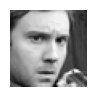

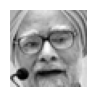

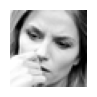

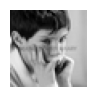

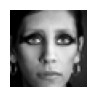

In [ ]:
# Display some images
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(flat_images[i].reshape(48, 48), cmap='gray')
    plt.axis('off')
    plt.show()


In [ ]:
# Remove Classes 5 and 6
data_filtered = data_train[(data_train['emotion'] != 5) & (data_train['emotion'] != 6)]
labels_filtered = data_filtered['emotion']
flat_images_filtered = flat_images[data_filtered.index]

In [ ]:
# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(flat_images_filtered, labels_filtered, test_size=0.2, random_state=42)

In [ ]:

# Extract HOG Features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features, _ = feature.hog(image.reshape(48, 48), visualize=True, block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

In [ ]:
# Train a Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
losses = []
for epoch in range(1, 11):  # Simulating 10 training epochs
    model.fit(X_train_hog, y_train)
    y_prob = model.predict_proba(X_train_hog)
    loss = log_loss(y_train, y_prob)
    losses.append(loss)
    print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 1: Loss = 1.0638
Epoch 2: Loss = 1.0638
Epoch 3: Loss = 1.0638
Epoch 4: Loss = 1.0638
Epoch 5: Loss = 1.0638
Epoch 6: Loss = 1.0638
Epoch 7: Loss = 1.0638
Epoch 8: Loss = 1.0638
Epoch 9: Loss = 1.0638
Epoch 10: Loss = 1.0638


In [ ]:

# Evaluate the Model
y_pred = model.predict(X_test_hog)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

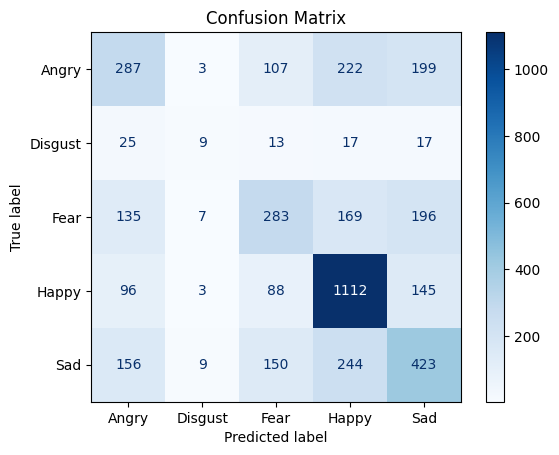

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


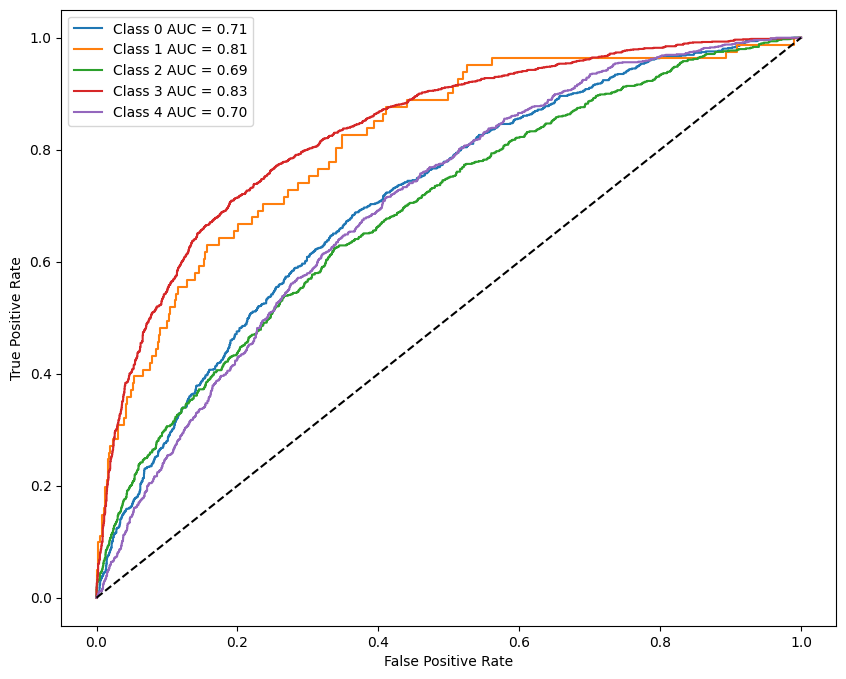

In [ ]:
# ROC and AUC
y_test_bin = label_binarize(y_test, classes=np.unique(labels_filtered))
y_score = model.decision_function(X_test_hog)

fpr = {}
tpr = {}
roc_auc = {}
num_classes = len(np.unique(y_test))

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]:.2f}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
accuracy

0.513730255164034

In [ ]:
precision

0.49630595124404386

In [ ]:
recall

0.513730255164034